In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['figure.facecolor'] = 'white'

### Random Walk

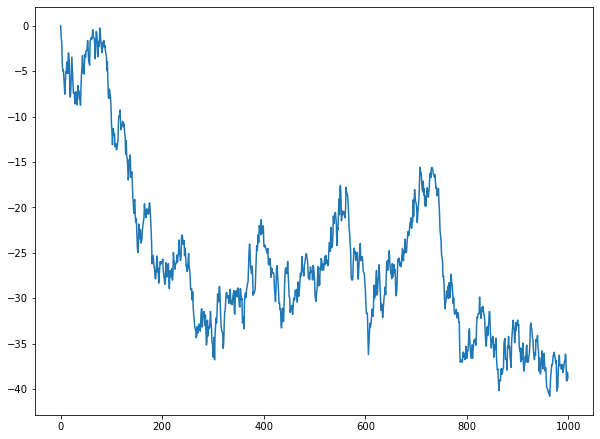

In [3]:
steps = np.random.standard_normal(1000)
steps[0] = 0


data = np.cumsum(steps)
plt.plot(data)

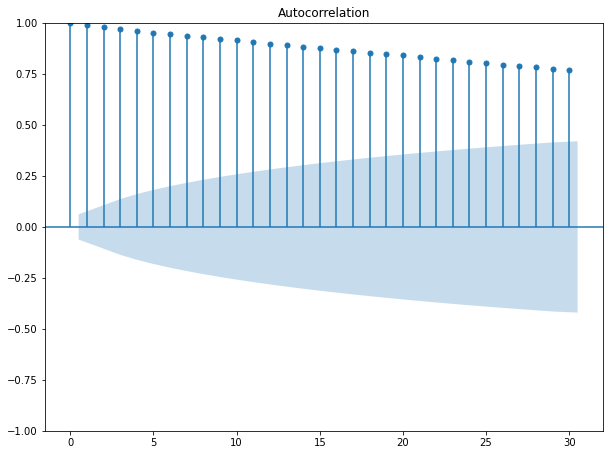

In [4]:
acfs = acf(data)

# fig = plt.figure(facecolor='white')
ax = plt.gca()
plot_acf(x = data, ax = plt.gca())
plt.show()

### Differencing

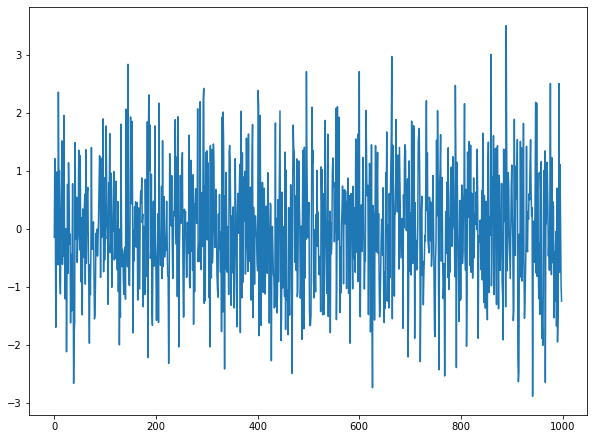

In [27]:
data_diff = np.diff(data)
plt.plot(data_diff)

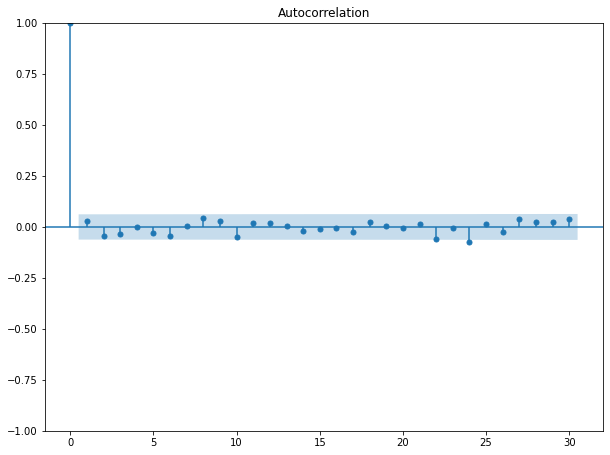

In [28]:
plot_acf(data_diff, ax = plt.gca())
plt.show()

### Moving Average Model - MA (2)

In [29]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

Text(0.5, 1.0, 'Moving average of process of order 2')

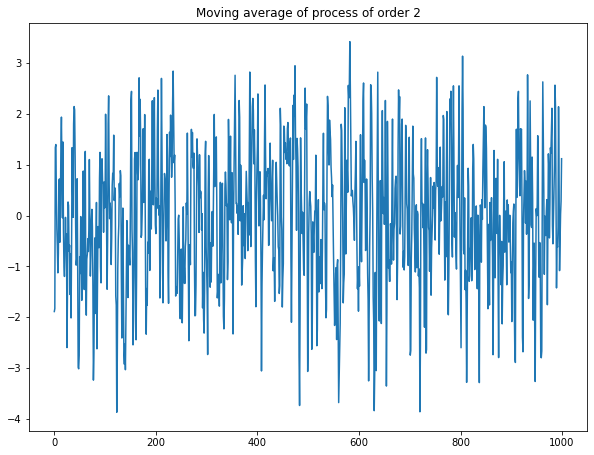

In [30]:
ma2 = np.array([1, .9, .3])
ar2 = np.array([1, 0, 0])
ma2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
plt.plot(ma2_process)
plt.title('Moving average of process of order 2')

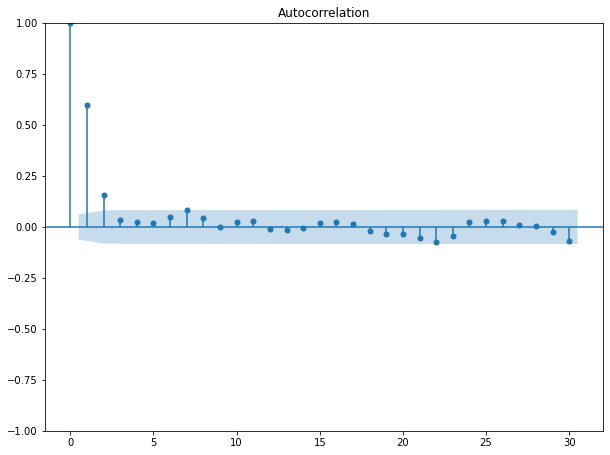

In [32]:
plot_acf(ma2_process)
plt.show()

In [33]:
ma_model = ARIMA(ma2_process, order=(0, 0, 2), enforce_stationarity=False).fit()
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1410.009
Date:                Mon, 28 Feb 2022   AIC                           2828.019
Time:                        18:27:25   BIC                           2847.638
Sample:                             0   HQIC                          2835.477
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0371      0.066     -0.558      0.577      -0.167       0.093
ma.L1          0.8495      0.033     25.474      0.000       0.784       0.915
ma.L2          0.2468      0.032      7.718      0.0

### Autoregressive models

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller

$y_t = 0.33y_{t - 1} + .5y_{t - 2}$

In [38]:
ar2 = np.array([1, .33, .5])
ma2 = np.array([1, 0, 0])

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

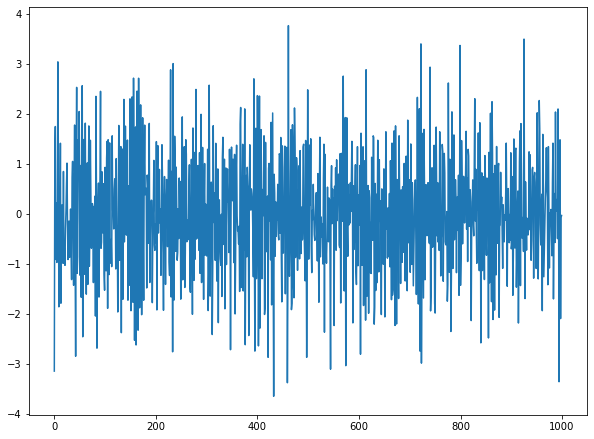

In [39]:
plt.plot(AR2_process)

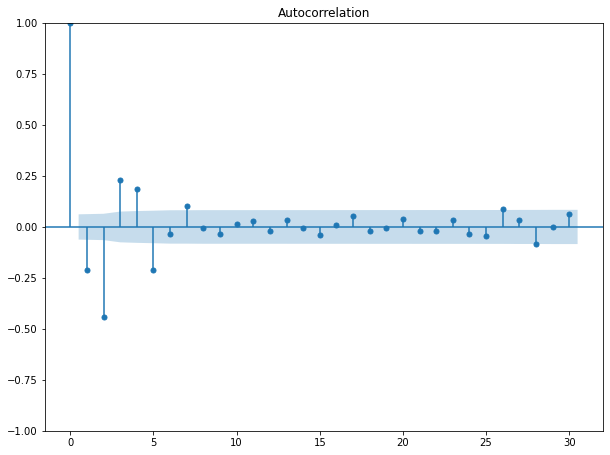

In [40]:
plot_acf(AR2_process)
plt.show()

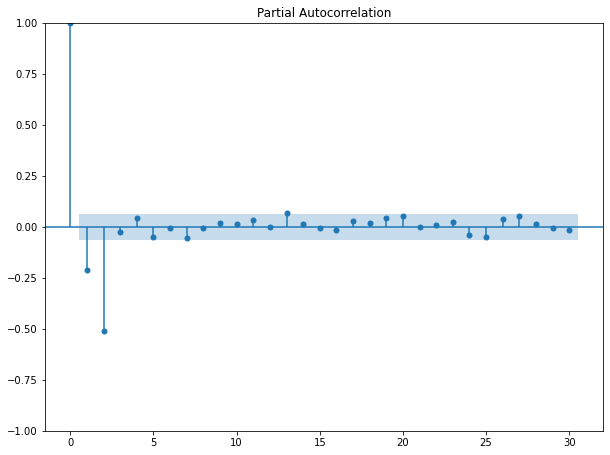

In [42]:
plot_pacf(AR2_process)
plt.show()

In [44]:
rho, sigma = yule_walker(AR2_process, 2, method = 'mle')
print(f'rho: {-rho}, sigma: {sigma}')

rho: [0.31639301 0.50920295], sigma: 1.0016893268099332


### ARMA(p, q)

In [46]:
ar1 = np.array([1, 0.33])
am1 = np.array([1, 0.9])

ARMA_1 = ArmaProcess(ar1, am1).generate_sample(nsample=1000)

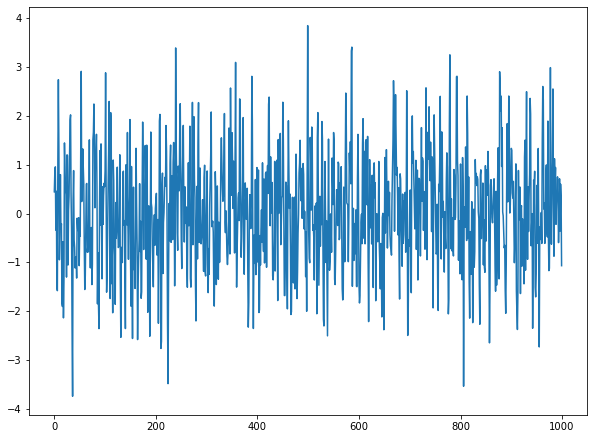

In [47]:
plt.plot(ARMA_1)

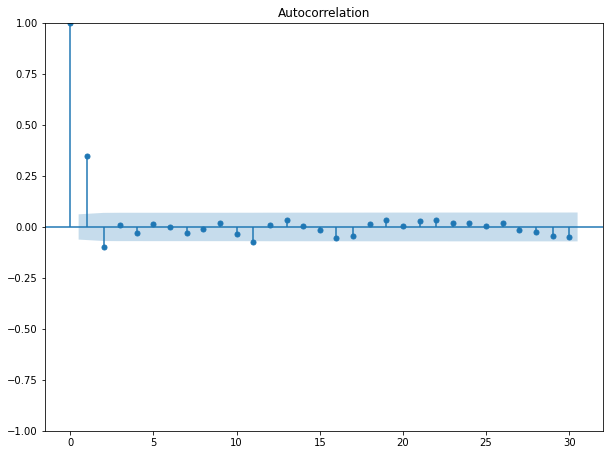

In [48]:
plot_acf(ARMA_1)
plt.show()

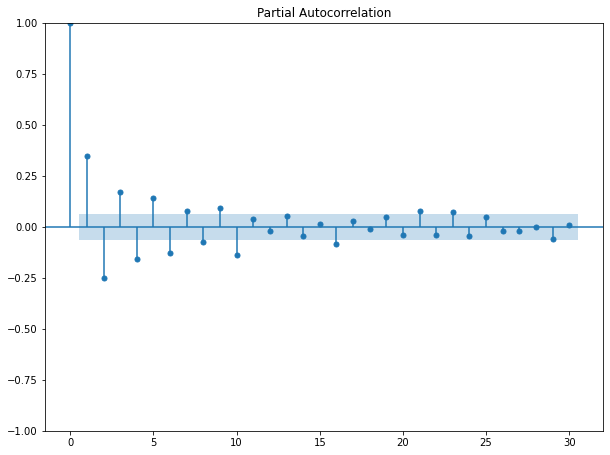

In [50]:

plot_pacf(ARMA_1)
plt.show()